<a href="https://colab.research.google.com/github/marantmir/curso_formacao_data_science/blob/main/IntroducaoDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checando a versão da biblioteca Seaborn e instalando versão específica

In [103]:
print(sns.__version__)

0.11.1


In [104]:
!pip install seaborn

# Importando Bibliotecas

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Analisando as notas em geral

Lendo o dataset


In [106]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Visualizar quantidade de linhas e colunas possui no dataset

In [107]:
notas.shape

(100836, 4)

Renomeando as colunas

In [108]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Filtrando apenas os valores únicos  da coluna notas

In [109]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Contar valores

In [110]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

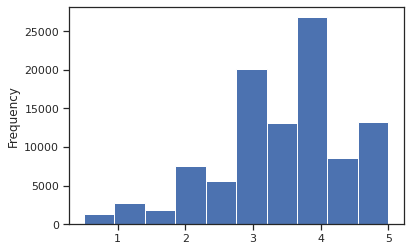

In [111]:
notas.nota.plot(kind = 'hist')

Obtendo a Média de todas as notas

In [112]:
print("Media", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


Explorar dados visualmente

In [113]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

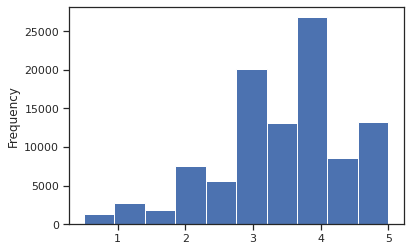

In [114]:
notas.nota.plot(kind = 'hist')

In [115]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Visualizando informações com a Biblioteca Seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


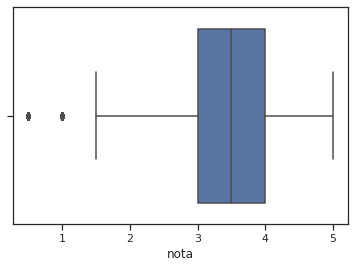

In [116]:
sns.boxplot(notas.nota)

# Analisando os filmes

Carregando dados do dataset movies.csv

In [117]:
filmes = pd.read_csv("movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Gerando histograma e estatísticas básicas das notas

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

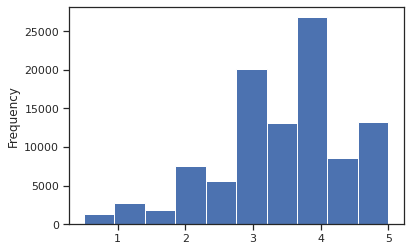

In [118]:
notas.nota.plot(kind='hist')
notas.nota.describe()

Renomeando as colunas do dataset

In [119]:
filmes.columns = ["filmeId", "titulo", 'generos']

Analisando algumas notas específicas por filme

In [120]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

Agrupar dataset pelo filmeId e gerando a média e mostrando apenas a média da coluna nota

In [121]:
notas.groupby("filmeId").mean().nota

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

Atribuindo o valor gerado em uma variável

In [122]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Plotar informações no Histograma

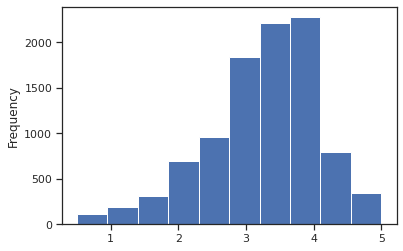

In [123]:
medias_por_filme.plot(kind="hist")

Plotando gráficos com Seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


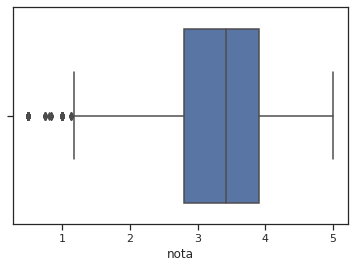

In [124]:
sns.boxplot(medias_por_filme)

Visualizando as estatísticas básicas através do describe

In [125]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Gráfico de Distribuição

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


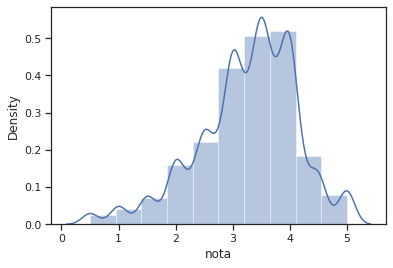

In [126]:
sns.distplot(medias_por_filme, bins=10)

Gerando Histograma com a biblioteca Matplotlib, incluindo o Título

Text(0.5, 1.0, 'Histograma das médias dos filmes')

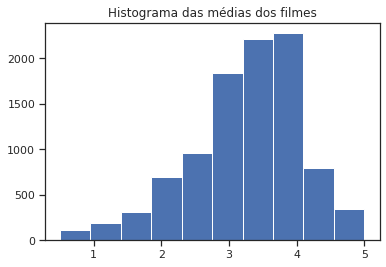

In [127]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

Gerando Boxplot na vertical ou seja no eixo y com Matplotlib

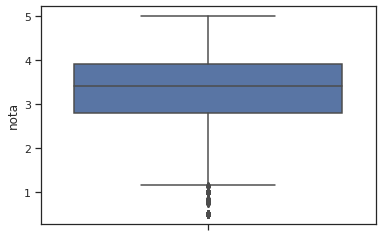

In [128]:
sns.boxplot(y=medias_por_filme)

Alterando o tamanho do Boxplot com Matplotlib

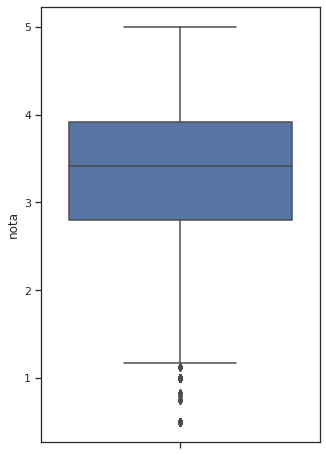

In [129]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

Médias dos Filmes 1,2 e 3

In [130]:
print("Média dos Filmes com ID 1:", notas.query("filmeId==1").nota.mean())
print("Média dos Filmes com ID 2:", notas.query("filmeId==2").nota.mean())
print("Média dos Filmes com ID 3:", notas.query("filmeId==3").nota.mean())

Média dos Filmes com ID 1: 3.9209302325581397
Média dos Filmes com ID 2: 3.4318181818181817
Média dos Filmes com ID 3: 3.2596153846153846


Obtendo a média de todos os filmes

In [131]:
medias_por_filme = notas.groupby("filmeId").nota.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

# Analisando dados TMB Filmes

Lendo e visualizando os dados

```
# Isto está formatado como código
```



In [132]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Mostrando as linguagens originais sem repetição

In [133]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [134]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

Descobrindo quantas vezes cada lingua original dos filmes aparecem

In [135]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
cs       2
ta       2
ro       2
id       2
ar       2
sl       1
vi       1
ps       1
af       1
xx       1
pl       1
el       1
tr       1
ky       1
te       1
is       1
nb       1
hu       1
no       1
Name: original_language, dtype: int64

Visualizando os índices desses dados

In [136]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'cs', 'ta', 'ro', 'id', 'ar', 'sl',
       'vi', 'ps', 'af', 'xx', 'pl', 'el', 'tr', 'ky', 'te', 'is', 'nb', 'hu',
       'no'],
      dtype='object')

Visualizando os valores desse dataset

In [137]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

Criando um dataframe a partir do índice

In [138]:
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


Resetar o índice

In [139]:
tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


Renomear as colunas

In [140]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["origianl_language", "total"]
contagem_de_lingua.head()

,origianl_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


# Visualizando gráficos por categoria

Descobrindo quantas vezes cada idioma aparece de forma básica

In [141]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
cs       2
ta       2
ro       2
id       2
ar       2
sl       1
vi       1
ps       1
af       1
xx       1
pl       1
el       1
tr       1
ky       1
te       1
is       1
nb       1
hu       1
no       1
Name: original_language, dtype: int64

Criar um dataframe a partir de um índice

In [142]:
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


Ajustar dados para obter as colunas separadas mais o índice

In [143]:
tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


Renomeando as colunas e demonstrando os 5 primeiros itens

In [144]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


Gerando gráfico de barras com Seaborn

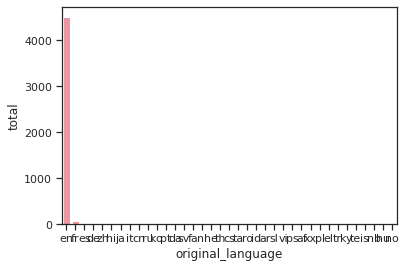

In [145]:
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

Utilizando catplot para plotar os dados com mais facilidade

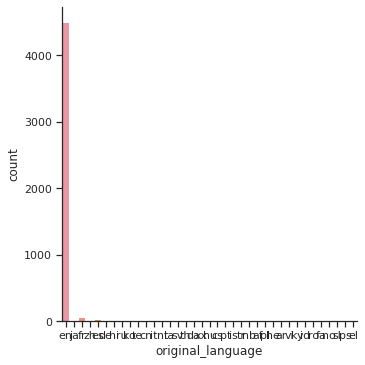

In [146]:
sns.catplot(x="original_language", kind="count", data=tmdb)

# Melhorando a visualização dos dados

Gráico de pizza não é usual por não possibilitar boa visualização, veja na figura a frente

([<matplotlib.patches.Wedge at 0x7f6c9d6b6e90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

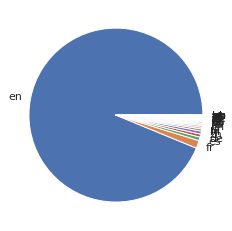

In [147]:
plt.pie(contagem_de_lingua["total"], labels=contagem_de_lingua["original_language"])

Selecionando apenas o idioma inglês com o atributo loc

In [148]:
total_por_lingua = tmdb["original_language"].value_counts()
total_por_lingua.loc["en"]

4505

Atribuindo esse retorno a outra variável

In [149]:
total_de_ingles = total_por_lingua.loc["en"]
print(total_de_ingles)

4505


Somando a quantidade de total de idiomas

In [150]:
total_geral = total_por_lingua.sum()
print(total_geral)

4803


Subtraindo o idioma inglês para obtermos o restante dos idiomas

In [151]:
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


Gerando o dataframe com o valores acima

In [152]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}

pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


In [153]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


Plotando os dados em um gráfico de barras

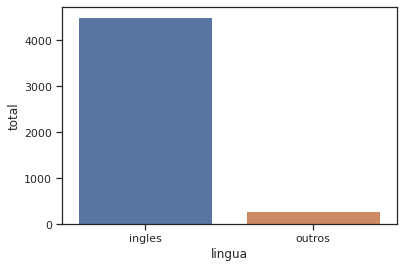

In [154]:
sns.barplot(data=dados, x = 'lingua', y = 'total')

# Visualizando outras categorias

Plotando gráfico de pizza

([<matplotlib.patches.Wedge at 0x7f6c9d5c1f90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

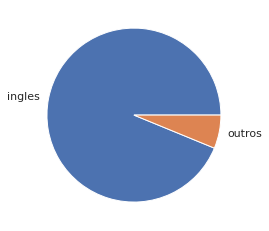

In [155]:
plt.pie(dados["total"], labels=dados["lingua"])

Selecionando apenas os filmes com idiomas em inglês do dataset

In [156]:
tmdb.query("original_language == 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New Yo

Removendo os filmes com idiomas em inglês do dataset

In [157]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ta     2
id     2
ar     2
ro     2
cs     2
te     1
xx     1
sl     1
vi     1
no     1
ps     1
is     1
pl     1
el     1
af     1
nb     1
ky     1
hu     1
tr     1
Name: original_language, dtype: int64

Atribuindo esses dados a uma variável

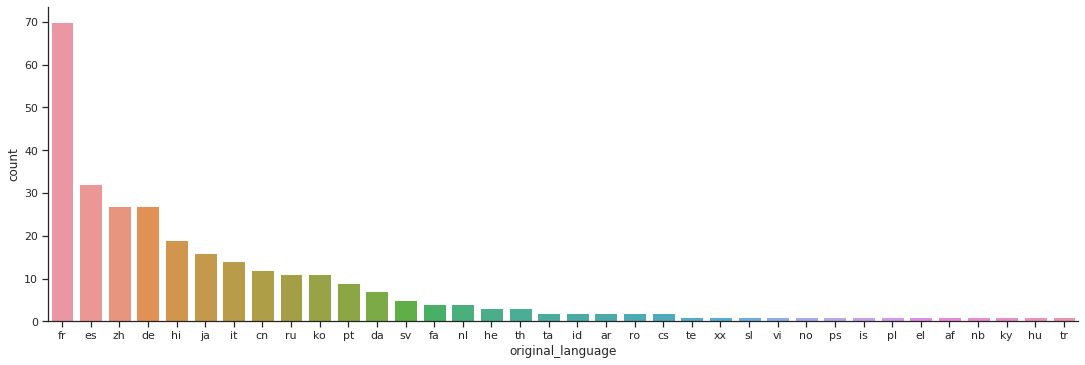

In [158]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", kind="count", data= filmes_sem_lingua_original_em_ingles,
            aspect=3,
            order=total_por_lingua_de_outros_filmes.index)

# Outros gráficos gerados com Seaborn

In [159]:
import seaborn as sns

In [160]:
sns.set(style="ticks")

In [161]:
# Carregando o conjunto de dados de exemplo para o quarteto de Anscombe
df = sns.load_dataset("anscombe")

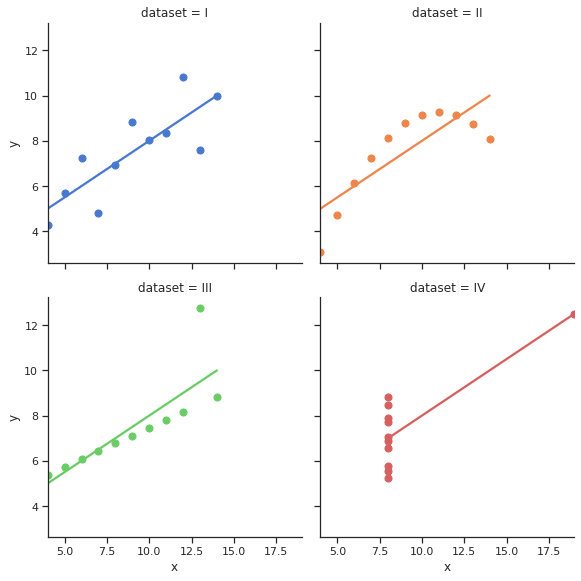

In [162]:
# Mostrando os resultados de uma regressão linear dentro de cada conjunto de dados
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s":50, "alpha":1})

# Média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão, como tudo isso se encaixa

## Lendo datasets

In [163]:
#filmes = pd.read_csv("movies.csv")
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [164]:
#notas = pd.read_csv("ratings.csv")
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [165]:
#tmdb = pd.read_csv("tmdb_5000_movies.csv")
#tmdb.head(2)

In [195]:
# Buscando notas dos filmes através do ID
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")

In [191]:
# Imprimindo a quantidade de notas para cada filme utilizando o comando len
print("Quantidade de Notas para Toy Story - ", len(notas_do_toy_story))
print("------------------------------------------")
print("Quantidade de Notas para Jumanji - ",len(notas_do_jumanji))

Quantidade de Notas para Toy Story -  215
------------------------------------------
Quantidade de Notas para Jumanji -  110


In [192]:
# imprimindo a Média das Notas de cada Filme
print("Nota média do Toy Stor - %.2f" % notas_do_toy_story.nota.mean())
print("-----------------------------")
print("Nota média do Jumanji - %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Stor - 3.92
-----------------------------
Nota média do Jumanji - 3.43


In [193]:
# Mediana dos filmes
print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("-------------------------")
print("Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
-------------------------
Mediana do Jumanji 3.50


In [197]:
# Gerando array com 10 valore repetidos com Numpy
np.array([2.5]*10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [198]:
# Gerando a média do array com 10 valore repetidos com Numpy
np.array([2.5]*10).mean()

2.5

In [206]:
# Gerando outro array com 10 valore repetidos com Numpy, agregando com o 
# anterior utilizando o comendo append e armazenando em uma variável filme1
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [207]:
# Gerando outro array com 10 valore repetidos com Numpy, agregando com o 
# anterior utilizando o comendo append e armazenando em uma variável filme2
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
filme2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [209]:
# Imprimindo a média dos dois filmes
print("Média do Filme 1: ", filme1.mean())
print("Média do Filme 2: ", filme2.mean())

Média do Filme 1:  3.0
Média do Filme 2:  3.0


In [212]:
# Imprimindo a mediana dos dois filmes
print("Mediana do Filme 1: ", np.median(filme1))
print("Mediana do Filme 2: ", np.median(filme2))

Mediana do Filme 1:  3.0
Mediana do Filme 2:  3.0


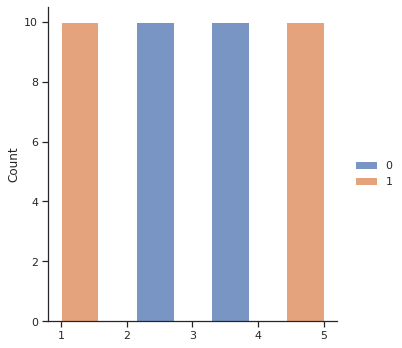

In [223]:
# Plotando as informações no gráfico Distplot
sns.displot([filme1, filme2])

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

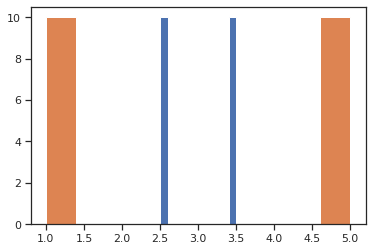

In [221]:
# Plotando gráficos com Histograma com Matplotlib
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f6c989bb950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6c989c2cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6c989c5d90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6c989c2510>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6c989b3b10>,
  <matplotlib.lines.Line2D at 0x7f6c98974f10>]}

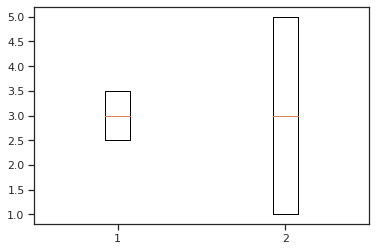

In [222]:
# Plotando Boxplot da médias dos filmes com Matplotlib
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f6c98a09c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6c98880110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6c98816910>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6c98816f50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6c98914c90>,
  <matplotlib.lines.Line2D at 0x7f6c98831f50>]}

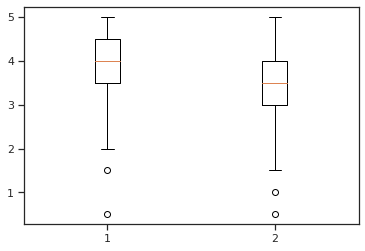

In [224]:
# Plotando Boxplot com todas as notas dos filmes com Matplotlib
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

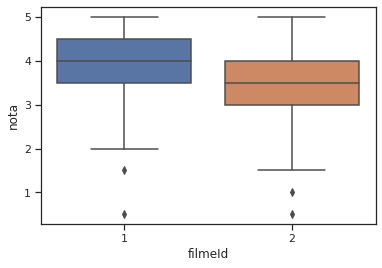

In [225]:
# Plotando Boxplot das notas dos filmes 1 e 2 com Seaborn
sns.boxplot(x= "filmeId", y="nota", data = notas.query("filmeId in (1,2)"))

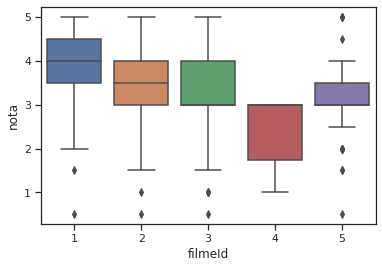

In [227]:
# Plotando Boxplot das notas dos filmes 1, 2, 3, 4 e 5 com Seaborn
sns.boxplot(x="filmeId", y="nota", data = notas.query("filmeId in (1,2,3,4,5)"))

In [230]:
# Achando o desvio padrão dos filmes
print("Desvio Padrão do Jumanji é %.2f" % notas_do_jumanji.nota.std())
print("Desvio Padrão do Toy Story é %.2f" % notas_do_toy_story.nota.std())

Desvio Padrão do Jumanji é 0.88
Desvio Padrão do Toy Story é 0.83
